In [1]:
from pathlib import Path
import numpy as np
import os,sys
import pandas as pd
import os
import skseq
from skseq.sequences.extended_feature import ExtendedFeatures
import utils
import skseq.sequences.structured_perceptron as spc

currentdir = Path.cwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 



# Structured Perceptron

In [2]:
X_tr, y_tr = utils.gen_set("./data/train_data_ner.csv")
X_test, y_test = utils.gen_set("./data/test_data_ner.csv")
X_tiny, y_tiny = utils.gen_set("./data/tiny_test.csv")

In [3]:
word_dict, tag_dict, rev_dict = utils.dictionary(X_tr, y_tr)

In [4]:
seq = utils.get_seq(word_dict, tag_dict, X_tr, y_tr)

KeyboardInterrupt: 

## Base Model

In [ ]:
feature_mapper = skseq.sequences.id_feature.IDFeatures(seq)

In [ ]:
feature_mapper.build_features()

In [ ]:

sp = spc.StructuredPerceptron(word_dict, tag_dict, feature_mapper)
sp.num_epochs = 5
sp.load_model(dir="./fitted_models/sp_base_")

### Train

In [ ]:
import importlib
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\manue\\Documents\\workspace\\Unity\\babies_vs_satan\\nlp_name_entity_recognition\\utils.py'>

In [ ]:
y_hats = utils.get_predictions(sp, X_tr)

In [ ]:
y_tr_ls = np.array([tag_dict[t] for t in np.concatenate(y_tr)])

{'accuracy': 0.9684081697831473, 'f1_score': 0.9681914545870688}

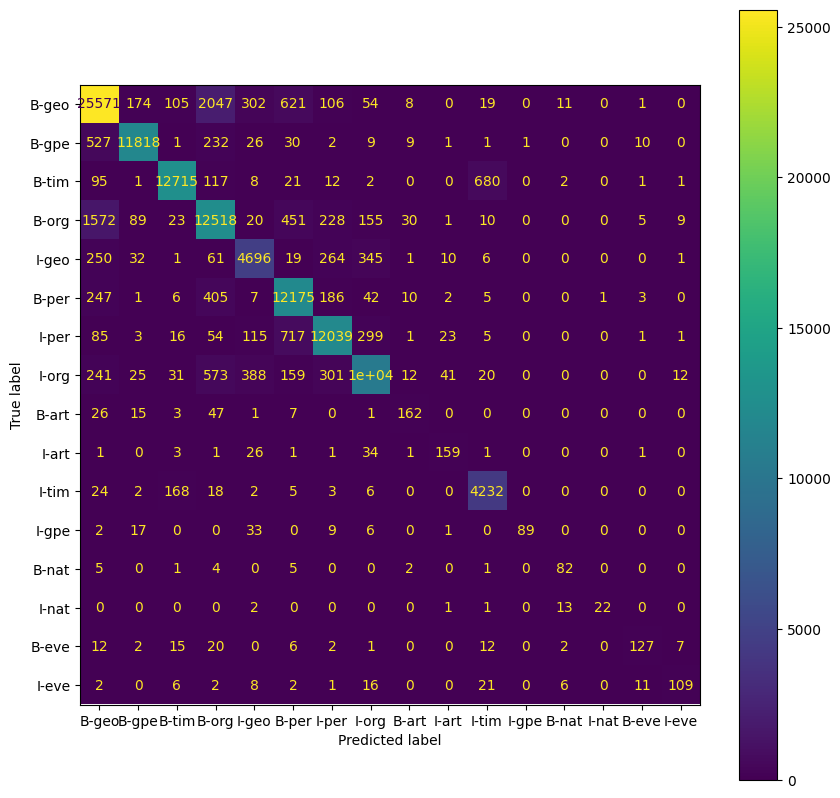

In [ ]:
utils.evaluate(y_tr_ls, y_hats, rev_dict)

### Test

In [ ]:
y_hats = utils.get_predictions(sp, X_test)

In [ ]:
y_test_ls = np.array([tag_dict[t] for t in np.concatenate(y_test)])

{'accuracy': 0.8772335877133269, 'f1_score': 0.8531773343020015}

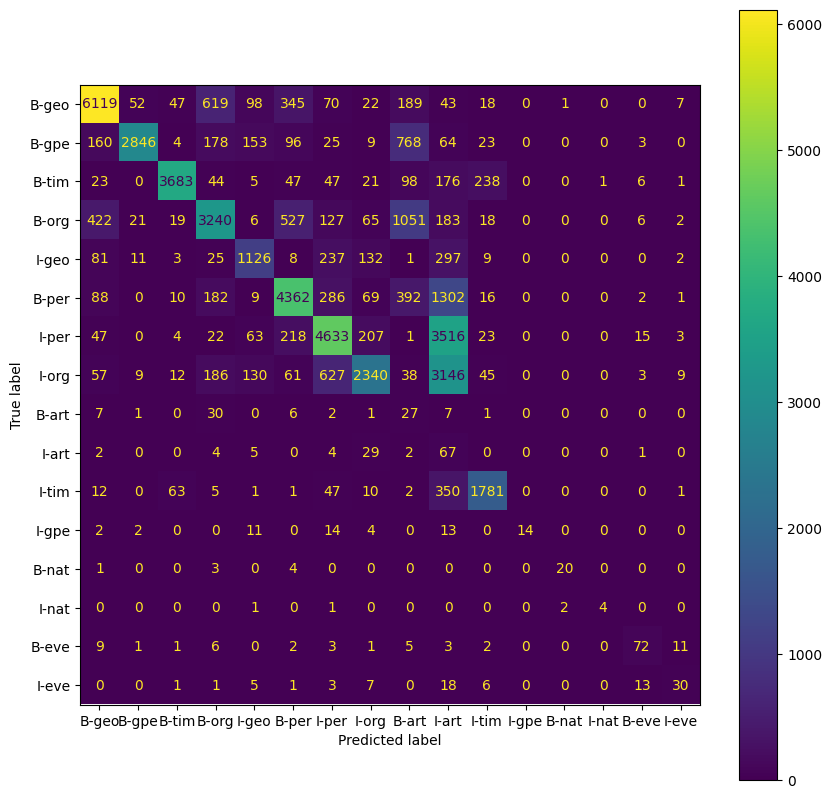

In [ ]:
utils.evaluate(y_test_ls, y_hats, rev_dict)

### Tiny Test

In [ ]:
y_hats = utils.get_predictions(sp, X_tiny)

In [ ]:
y_tiny_ls = np.array([tag_dict[t] for t in np.concatenate(y_tiny)])

{'accuracy': 0.8972602739726028, 'f1_score': 0.8848977663809974}

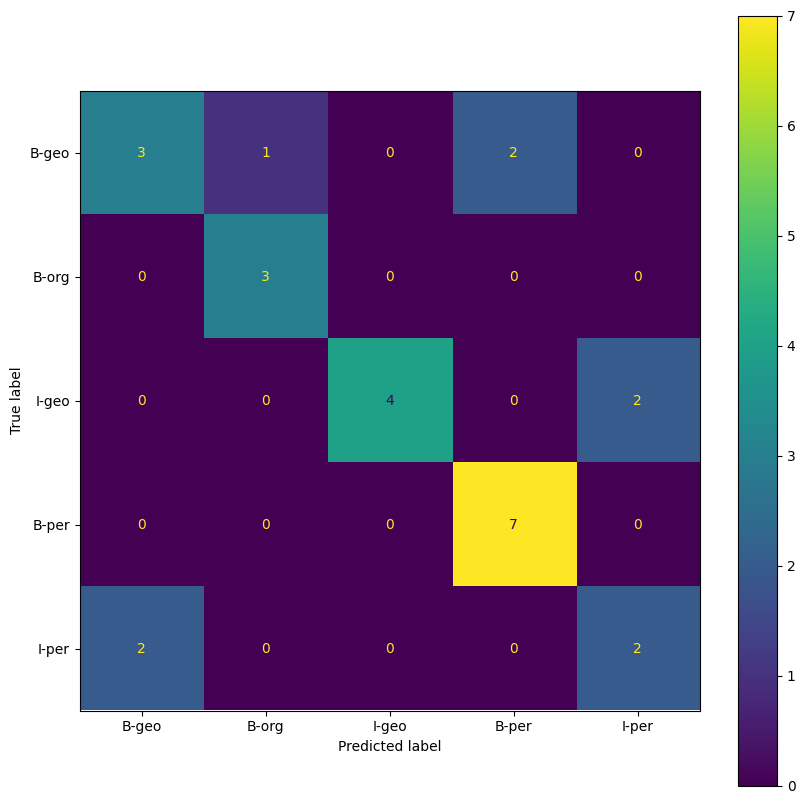

In [ ]:
utils.evaluate(y_tiny_ls, y_hats, rev_dict)

## Extended Features

In [ ]:
feature_mapper_extra = ExtendedFeatures(seq)
feature_mapper_extra.build_features()

In [ ]:
sp = spc.StructuredPerceptron(word_dict, tag_dict, feature_mapper_extra)
sp.num_epochs = 5
sp.load_model(dir="./fitted_models/sp_ext_")

### Train

In [ ]:
y_hats = utils.get_predictions(sp, X_tr)

KeyboardInterrupt: 

In [ ]:
y_tr_ls = np.array([tag_dict[t] for t in np.concatenate(y_tr)])

{'accuracy': 0.8315910467699095, 'f1_score': 0.9639048305699943}

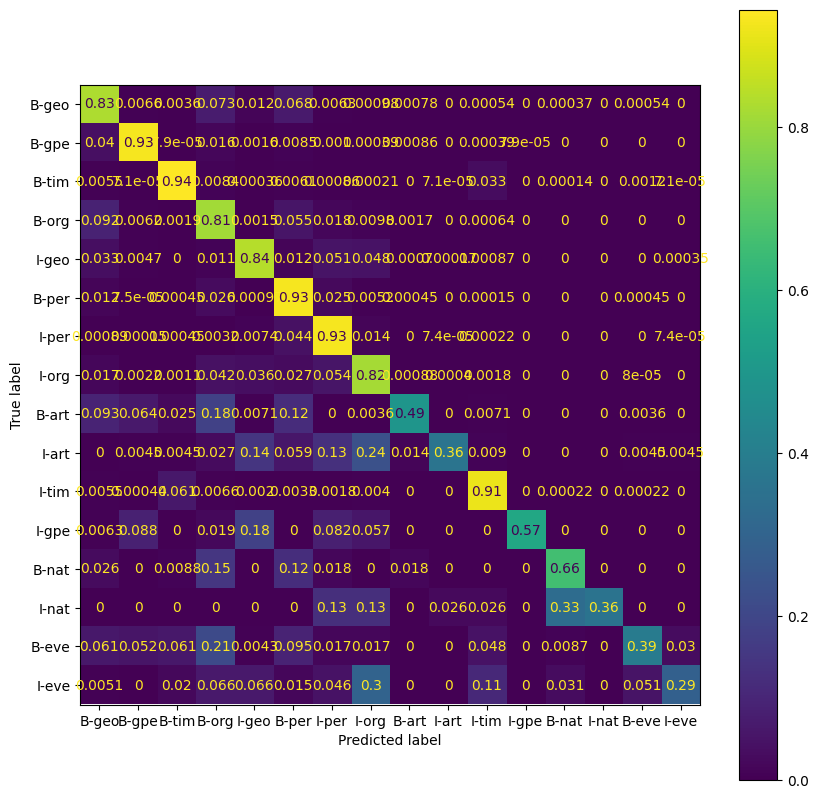

In [ ]:
utils.evaluate(y_tr_ls, y_hats, rev_dict)

### Test

In [ ]:
y_hats = utils.get_predictions(sp, X_test)

In [ ]:
y_test_ls = np.array([tag_dict[t] for t in np.concatenate(y_test)])

{'accuracy': 0.8310862237686202, 'f1_score': 0.9681914545870688}

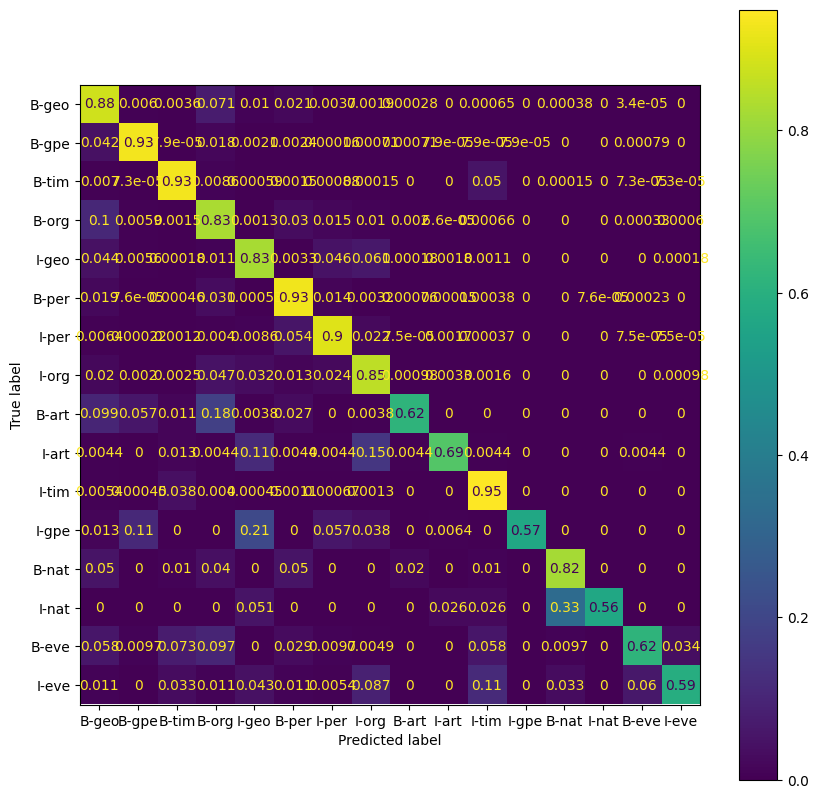

In [ ]:
utils.evaluate(y_test_ls, y_hats, rev_dict)

### Tiny Test

In [ ]:
y_hats = utils.get_predictions(sp, X_tiny)

In [ ]:
y_tiny_ls = np.array([tag_dict[t] for t in np.concatenate(y_tiny)])

{'accuracy': 0.8310862237686202, 'f1_score': 0.9681914545870688}

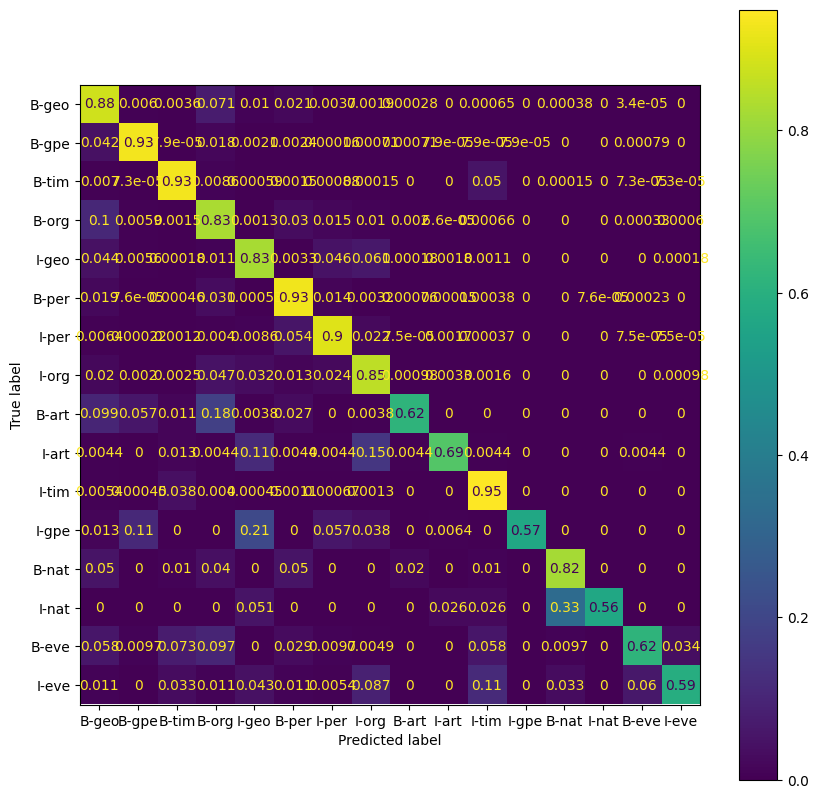

In [ ]:
utils.evaluate(y_tiny_ls, y_hats, rev_dict)

# Deep Learning